C:\Users\soswo\AppData\Local\Temp\ipykernel_25748\4269993729.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_data, x='Country', y=metric, palette='Set2')
C:\Users\soswo\AppData\Local\Temp\ipykernel_25748\4269993729.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_data, x='Country', y=metric, palette='Set2')
C:\Users\soswo\AppData\Local\Temp\ipykernel_25748\4269993729.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_data, x='Country', y=metric, palette='Set2')


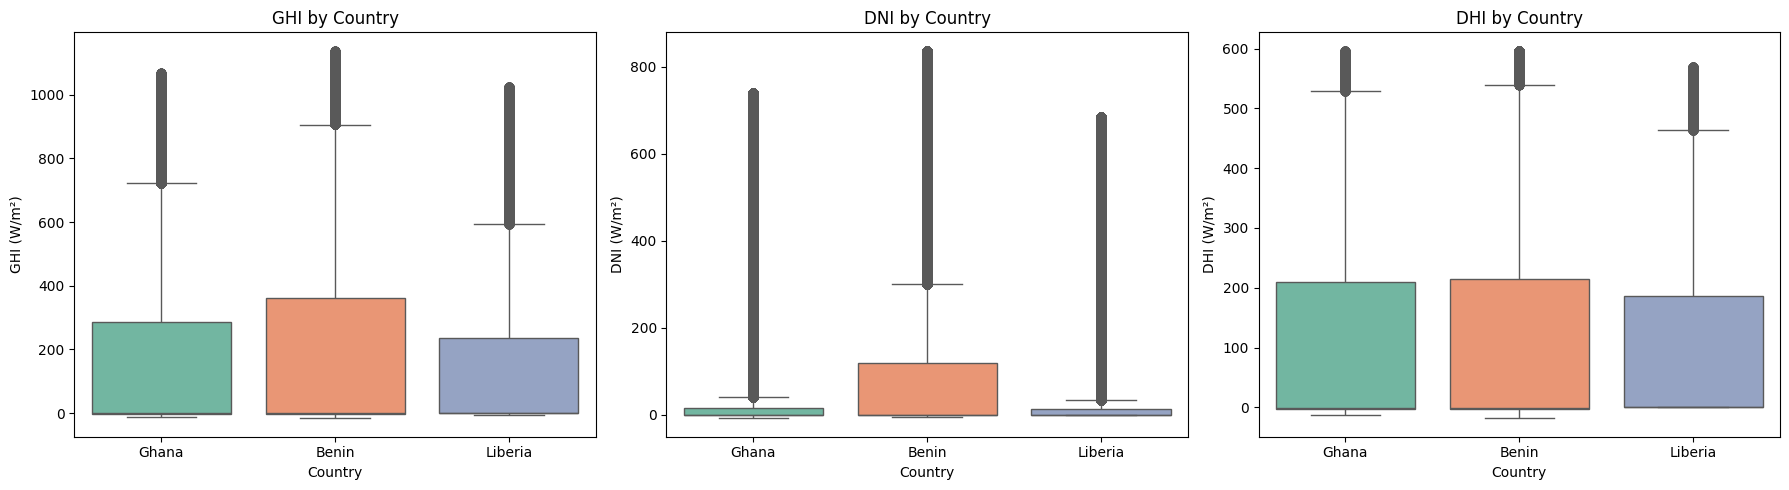

📊 Summary Statistics by Country:

            GHI                    DNI                    DHI               
           mean median     std    mean median     std    mean median     std
Country                                                                     
Benin    200.59   -0.6  298.78  123.56   -0.1  229.25  108.98   -0.7  154.94
Ghana    169.79   -0.4  263.27   87.69   -0.1  187.79  107.25   -0.3  153.35
Liberia  148.55   -0.2  238.83   67.68    0.0  157.88   99.52    0.0  144.72


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File paths
paths = {
    "Ghana": r'C:\Users\soswo\OneDrive\Desktop\projects\solar-challenge-week1\data\processed\Ghana_clean.csv',
    "Benin": r'C:\Users\soswo\OneDrive\Desktop\projects\solar-challenge-week1\data\processed\Benin_clean.csv',
    "Liberia": r'C:\Users\soswo\OneDrive\Desktop\projects\solar-challenge-week1\data\processed\Liberia_clean.csv'
}

# Load and label data
dfs = []
for country, path in paths.items():
    df = pd.read_csv(path, encoding='ISO-8859-1')
    df = df.iloc[1:].copy()  # Drop first row if it contains units
    for col in ['GHI', 'DNI', 'DHI']:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    df['Country'] = country
    dfs.append(df[['GHI', 'DNI', 'DHI', 'Country']])

# Combine all into one DataFrame
all_data = pd.concat(dfs, ignore_index=True)

# --- Boxplots for each metric ---
metrics = ['GHI', 'DNI', 'DHI']
plt.figure(figsize=(18, 5))
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=all_data, x='Country', y=metric, palette='Set2')
    plt.title(f'{metric} by Country')
    plt.ylabel(f'{metric} (W/m²)')
plt.tight_layout()
plt.show()

# --- Summary Table ---
summary_table = all_data.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)
print("📊 Summary Statistics by Country:\n")
print(summary_table)
